In [103]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from pprint import pprint

# scraping modules
from requests import get
from bs4 import BeautifulSoup

import unicodedata
import re
import json

from wordcloud import WordCloud

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

import acquire

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
plt.rc('figure', figsize=(16,8))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

In [33]:
df = acquire.scrape_github_data()

In [34]:
df = pd.DataFrame(df)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
repo               3 non-null object
language           3 non-null object
readme_contents    3 non-null object
dtypes: object(3)
memory usage: 200.0+ bytes


In [36]:
df.head()

,repo,language,readme_contents
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...


## Distribution of languages used

In [51]:
df_lang_count = pd.DataFrame(df.language.value_counts())

In [53]:
df_lang_count

,language
C,1
JavaScript,1
Shell,1


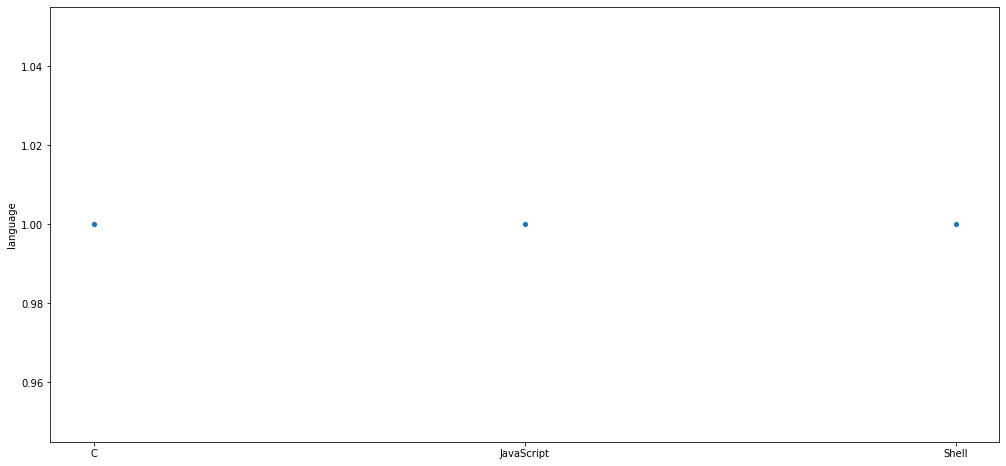

In [57]:
plt.figure(figsize=(17,8))
x = df_lang_count.index
y = df_lang_count.language
sns.scatterplot(data=df_lang_count, x=x, y=y)

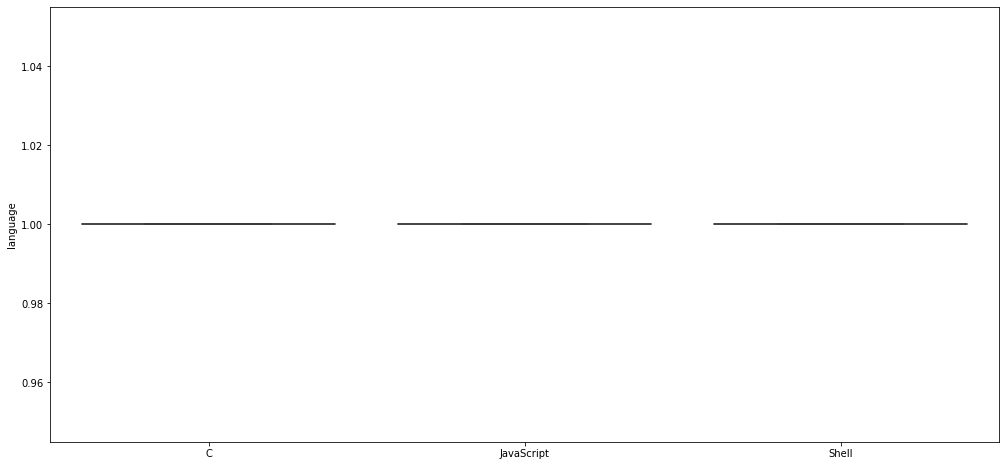

In [58]:
plt.figure(figsize=(17,8))
x = df_lang_count.index
y = df_lang_count.language
sns.boxplot(data=df_lang_count, x=x, y=y)

## exploring words used

In [62]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [64]:
df_clean = clean(' '.join(df.readme_contents))

In [67]:
df_clean

['codeup',
 'setup',
 'script',
 'setup',
 'script',
 'codeup',
 'student',
 'laptop',
 'install',
 'tool',
 'need',
 'java',
 'course',
 'install',
 'following',
 'xcodehttpsdeveloperapplecomxcodefeatures',
 'command',
 'line',
 'tool',
 'mac',
 'brewhttpbrewsh',
 'package',
 'manager',
 'mac',
 'javahttpsenwikipediaorgwikijava_programming_language',
 'tomcathttptomcatapacheorg',
 'java',
 'webserver',
 'mavenhttpsmavenapacheorg',
 'java',
 'dependency',
 'build',
 'management',
 'tool',
 'mysqlhttpswwwmysqlcom',
 'database',
 'well',
 'use',
 'class',
 'node',
 'jshttpsnodejsorgen',
 'javascript',
 'runtime',
 'outside',
 'browser',
 'npmhttpswwwnpmjscom',
 'package',
 'manager',
 'javascript',
 'addition',
 'setup',
 'ssh',
 'key',
 'student',
 'laptop',
 'guide',
 'process',
 'linking',
 'ssh',
 'key',
 'github',
 'account',
 'setup',
 'global',
 'gitignore',
 'file',
 'set',
 'default',
 'commit',
 'editor',
 'nano',
 'already',
 'set',
 'student',
 'copy',
 'paste',
 'following',

(-0.5, 1199.5, 899.5, -0.5)

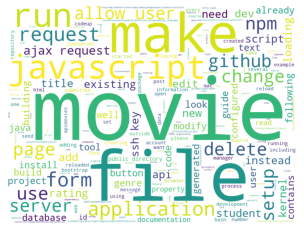

In [69]:
text = ' '.join(df_clean)
wc = WordCloud(background_color='white', width=1200, height=900)
img = wc.generate(text)

plt.imshow(img)
plt.axis('off')

## most common words in readme


In [75]:
common_words = pd.Series(df_clean).value_counts()
common_words.sort_values().tail(25)

edit            4
kernel          4
loading         4
api             4
allow           5
use             5
change          5
ajax            5
server          5
1               5
setup           5
key             5
github          5
page            5
npm             5
delete          5
application     6
form            6
run             7
javascript      7
make            8
user            8
request        11
file           14
movie          23
dtype: int64

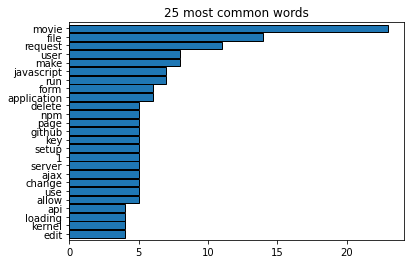

In [76]:
most_common_words = common_words.sort_values().tail(25)
most_common_words.drop(columns='all').plot.barh(width=.9, ec='black', title='25 most common words')

## Does the length of the README vary by programming language?

In [81]:
df2 = df[['language', 'readme_contents']]

In [83]:
df2['readme_contents'] = df2.readme_contents.apply(clean)

In [88]:
df2['length_of_readme'] = df2.readme_contents.apply(len)
df2.head()

,language,readme_contents,length_of_readme
0,Shell,"[codeup, setup, script, setup, script, codeup,...",116
1,JavaScript,"[movie, application, project, building, single...",411
2,C,"[linux, kernel, several, guide, kernel, develo...",58


> Scatter plot where length of readme is y-axis, x-axis is how many programming languages and hue is label of programming language

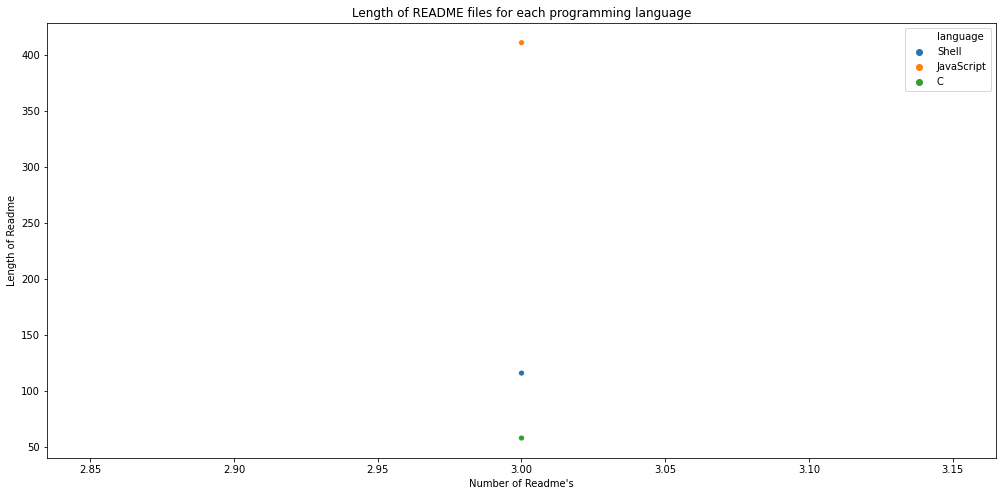

In [96]:
plt.figure(figsize=(17,8))
plt.title('Length of README files for each programming language')
x
x = df2.language.count()
y = df2.length_of_readme
hue = df2.language
sns.scatterplot(data=df_lang_count, x=x, y=y, hue=hue)
plt.ylabel('Length of Readme')
plt.xlabel('Number of Readme\'s')
plt.show()


## What does the distribution of IDFs look like for the most common words?


In [114]:
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df_clean)

In [115]:
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(df_clean)

In [116]:
pd.Series(dict(zip(tfidf.get_feature_names(), tfidf.idf_))).sort_values()

movie                                                   4.195266
file                                                    4.665270
request                                                 4.888413
make                                                    5.176095
user                                                    5.176095
                                                          ...   
involve                                                 6.680173
javahttpsenwikipediaorgwikijava_programming_language    6.680173
jshttpsnodejsorgen                                      6.680173
ie                                                      6.680173
xcodehttpsdeveloperapplecomxcodefeatures                6.680173
Length: 306, dtype: float64

In [118]:
df3 = pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names()).T

In [124]:
df3.sort_values()

TypeError: sort_values() missing 1 required positional argument: 'by'

### Do different programming languages use a different number of unique words?